In [1]:
import numpy as np # had to downgrade NumPy to resolve compatiblity issue
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [16]:
housing.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyle    

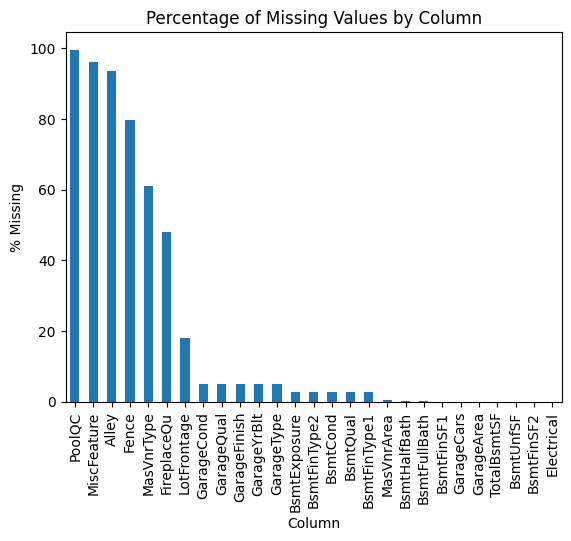

In [20]:
# Calculate % missing
missing_percent = housing.isna().mean() * 100

# Filter only columns with missing values
missing_percent = missing_percent[missing_percent > 0]

missing_percent.sort_values(ascending=False).plot.bar()
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% Missing')
plt.xlabel('Column')
plt.show()


In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

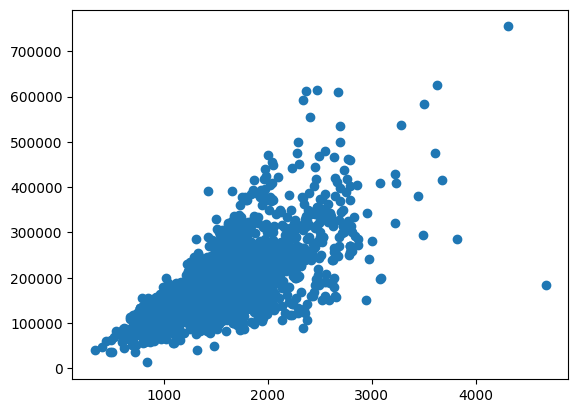

In [6]:
plt.scatter(housing.GrLivArea, housing.SalePrice)

In [7]:
import seaborn as sns

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

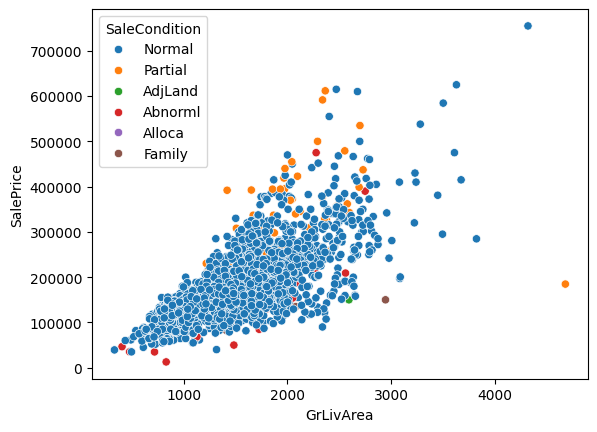

In [8]:
sns.scatterplot(data=housing, x='GrLivArea', y='SalePrice', hue='SaleCondition')

In [10]:
housing.loc[ :,['GrLivArea','1stFlrSF','2ndFlrSF']]

,GrLivArea,1stFlrSF,2ndFlrSF
1,856,856,0
2,1049,1049,0
3,1001,1001,0
4,1039,717,322
5,1665,810,855
...,...,...,...
759,952,952,0
760,1733,1733,0
761,2002,1001,1001
762,1842,985,857


In [11]:
(housing['GrLivArea'] == housing['1stFlrSF'] + housing['2ndFlrSF']).all()


False

In [15]:
housing[housing['GrLivArea'] != housing['1stFlrSF'] + housing['2ndFlrSF']].loc[ :,['GrLivArea','1stFlrSF','2ndFlrSF']]

,GrLivArea,1stFlrSF,2ndFlrSF
171,2377,1313,0
182,935,779,0
206,1484,866,504
212,1200,520,600
220,1522,1008,0
340,1382,854,0
470,2358,938,1215
475,1656,808,704
676,1531,1169,0
767,1480,1044,0


In [12]:
# import numpy as np
np.isclose(housing['GrLivArea'], housing['1stFlrSF'] + housing['2ndFlrSF']).all()


False

In [ ]:
!pip uninstall tables

- Nominal Variables (Categorical, No Order)
- Ordinal Variables (Categorical, With Order)
- Discrete Variables (Quantitative, Countable)
- Continuous Variables (Quantitative, Measurable)